# Import Libraries

In [1]:
# for creating neural network architecture
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# for image processing
import cv2
import numpy as np

# for dataset management
import os

# for time management
from tqdm import tqdm 

# for plotting curves
import matplotlib.pyplot as plt

# for plotting confusion matrix
from mlxtend.plotting import plot_confusion_matrix


# Setup memory growth for GPU
comment out this cell if using cpu


In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Load Dataset

In [3]:
train_directory = '/mnt/335fff25-d210-4fe2-8249-4ba8b4a17ce4/DATASETS/Shrabana/retina/OCT2017/train'
val_directory = '/mnt/335fff25-d210-4fe2-8249-4ba8b4a17ce4/DATASETS/Shrabana/retina/OCT2017/val'
test_directory = '/mnt/335fff25-d210-4fe2-8249-4ba8b4a17ce4/DATASETS/Shrabana/retina/OCT2017/test'

# Analyze Dataset

### Train dataset

#### Get image data

In [4]:
width_lis = []
height_lis = []

total = sum([len(files) for r, d, files in os.walk(train_directory)])

with tqdm(total=total) as pbar:
    for classname in os.listdir(train_directory):
        class_dir = os.path.join(train_directory, classname)
        for filename in os.listdir(class_dir):
            file = os.path.join(class_dir, filename)
            img = cv2.imread(file)

            height_lis.append(img.shape[0])
            width_lis.append(img.shape[1])
            
            pbar.set_description("Progress")
            pbar.update()

Progress: 100%|██████████| 83484/83484 [22:30<00:00, 61.80it/s] 


In [6]:
avg_height = (np.mean(height_lis), np.std(height_lis))
avg_width = (np.mean(width_lis), np.std(width_lis))

smallest_height = min(height_lis)
smallest_width = min(width_lis)

print(avg_height)
print(avg_width)

print(smallest_height)
print(smallest_width)

(498.96219634900103, 6.214542169297849)
(682.093239423123, 306.2901569182483)
496
384


#### Resize image

In [7]:
total = sum([len(files) for r, d, files in os.walk(train_directory)])

with tqdm(total=total) as pbar:
    for classname in os.listdir(train_directory):
        class_dir = os.path.join(train_directory, classname)
        for filename in os.listdir(class_dir):
            file = os.path.join(class_dir, filename)
            img = cv2.imread(file)
            res = cv2.resize(img, (128, 128))
            cv2.imwrite(file, res)
            
            pbar.set_description("Progress")
            pbar.update()

Progress: 100%|██████████| 83484/83484 [07:58<00:00, 174.49it/s]


### Validation dataset

#### Get image data

In [8]:
width_lis = []
height_lis = []

total = sum([len(files) for r, d, files in os.walk(val_directory)])

with tqdm(total=total) as pbar:
    for classname in os.listdir(val_directory):
        class_dir = os.path.join(val_directory, classname)
        for filename in os.listdir(class_dir):
            file = os.path.join(class_dir, filename)
            img = cv2.imread(file)

            height_lis.append(img.shape[0])
            width_lis.append(img.shape[1])
            
            pbar.set_description("Progress")
            pbar.update()

Progress: 100%|██████████| 32/32 [00:00<00:00, 154.68it/s]


In [9]:
avg_height = (np.mean(height_lis), np.std(height_lis))
avg_width = (np.mean(width_lis), np.std(width_lis))

smallest_height = min(height_lis)
smallest_width = min(width_lis)

print(avg_height)
print(avg_width)

print(smallest_height)
print(smallest_width)

(496.0, 0.0)
(576.0, 110.85125168440814)
496
512


#### Resize image

In [10]:
total = sum([len(files) for r, d, files in os.walk(val_directory)])

with tqdm(total=total) as pbar:
    for classname in os.listdir(val_directory):
        class_dir = os.path.join(val_directory, classname)
        for filename in os.listdir(class_dir):
            file = os.path.join(class_dir, filename)
            img = cv2.imread(file)
            res = cv2.resize(img, (128, 128))
            cv2.imwrite(file, res)
            
            pbar.set_description("Progress")
            pbar.update()

Progress: 100%|██████████| 32/32 [00:00<00:00, 218.49it/s]


### Testing dataset

#### Get image data

In [11]:
width_lis = []
height_lis = []

total = sum([len(files) for r, d, files in os.walk(test_directory)])

with tqdm(total=total) as pbar:
    for classname in os.listdir(test_directory):
        class_dir = os.path.join(test_directory, classname)
        for filename in os.listdir(class_dir):
            file = os.path.join(class_dir, filename)
            img = cv2.imread(file)

            height_lis.append(img.shape[0])
            width_lis.append(img.shape[1])
            
            pbar.set_description("Progress")
            pbar.update()

Progress: 100%|██████████| 968/968 [00:05<00:00, 180.30it/s]


In [12]:
avg_height = (np.mean(height_lis), np.std(height_lis))
avg_width = (np.mean(width_lis), np.std(width_lis))

smallest_height = min(height_lis)
smallest_width = min(width_lis)

print(avg_height)
print(avg_width)

print(smallest_height)
print(smallest_width)

(496.0, 0.0)
(571.7685950413223, 111.98618276122751)
496
512


#### Resize Image

In [13]:
total = sum([len(files) for r, d, files in os.walk(test_directory)])

with tqdm(total=total) as pbar:
    for classname in os.listdir(test_directory):
        class_dir = os.path.join(test_directory, classname)
        for filename in os.listdir(class_dir):
            file = os.path.join(class_dir, filename)
            img = cv2.imread(file)
            res = cv2.resize(img, (128, 128))
            cv2.imwrite(file, res)
            
            pbar.set_description("Progress")
            pbar.update()

Progress: 100%|██████████| 968/968 [00:04<00:00, 204.00it/s]


# Callbacks

In [26]:
learning_rate = 0.001

def lr_schedule(epoch):
    return learning_rate * (0.1 ** int(epoch / 10))

best_model_name = 'model.h5'

callback = [tf.keras.callbacks.LearningRateScheduler(lr_schedule, verbose = 1),
            tf.keras.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0.001, patience = 5, verbose = 1, mode = "min"),
            tf.keras.callbacks.ModelCheckpoint(best_model_name, monitor = 'loss', verbose = 1, save_best_only = True, mode = 'min')]

# Model Architecture

In [31]:
output_activation = 'softmax'
output_neurons = 4

model = tf.keras.models.Sequential([
    # 1st layer
    tf.keras.layers.Conv2D(16, (3,3), padding = 'same', activation='relu', input_shape=(128, 128, 3)),
#     tf.keras.layers.Conv2D(16, (3,3), padding = 'same', activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    # 2nd layer
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation='relu'),
#     tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # 3rd layer
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu'),
#     tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # 4th layer
    tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
#     tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # 5th layer
    tf.keras.layers.Conv2D(256, (3,3), padding = 'same', activation='relu'),
#     tf.keras.layers.Conv2D(256, (3,3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # flatten
    tf.keras.layers.Flatten(),
    
    # dense layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(output_neurons, activation = output_activation)
])


In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 128)      

In [33]:
loss = 'categorical_crossentropy'
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)


model.compile(loss = loss,
              optimizer = optimizer,
              metrics=['accuracy'])

# Configure Image Data Generator

In [34]:
class_mode = 'categorical'
batch_size = 8
target_size = (128,128)


train_datagen = ImageDataGenerator(rescale=1.0/255.0)


train_generator = train_datagen.flow_from_directory(train_directory,
                                                    batch_size = batch_size,
                                                    class_mode = class_mode,
                                                    target_size = target_size)

validation_generator = train_datagen.flow_from_directory(val_directory,
                                                    batch_size = batch_size,
                                                    class_mode = class_mode,
                                                    target_size = target_size)

test_generator = train_datagen.flow_from_directory(test_directory,
                                                    batch_size = batch_size,
                                                    class_mode = class_mode,
                                                    target_size = target_size)

Found 83484 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Found 968 images belonging to 4 classes.


# Train 

In [35]:
history = model.fit(train_generator,
                    epochs = 50,
                    verbose = 1,
                    callbacks = callback,
                    validation_data = validation_generator,
                    shuffle = True)

Epoch 1/50

Epoch 00001: LearningRateScheduler reducing learning rate to 0.001.
10436/10436 [==============================] - 89s 8ms/step - loss: 0.8263 - accuracy: 0.6697 - val_loss: 0.4776 - val_accuracy: 0.8125

Epoch 00001: loss improved from 1.23094 to 0.60495, saving model to best_model.h5
Epoch 2/50

Epoch 00002: LearningRateScheduler reducing learning rate to 0.001.
10436/10436 [==============================] - 87s 8ms/step - loss: 0.3654 - accuracy: 0.8716 - val_loss: 0.3830 - val_accuracy: 0.8750

Epoch 00002: loss improved from 0.60495 to 0.34520, saving model to best_model.h5
Epoch 3/50

Epoch 00003: LearningRateScheduler reducing learning rate to 0.001.
10436/10436 [==============================] - 93s 9ms/step - loss: 0.2851 - accuracy: 0.9033 - val_loss: 0.0887 - val_accuracy: 0.9375

Epoch 00003: loss improved from 0.34520 to 0.27719, saving model to best_model.h5
Epoch 4/50

Epoch 00004: LearningRateScheduler reducing learning rate to 0.001.
10436/10436 [==========

Epoch 28/50

Epoch 00028: LearningRateScheduler reducing learning rate to 1.0000000000000003e-05.
10436/10436 [==============================] - 99s 9ms/step - loss: 0.0546 - accuracy: 0.9814 - val_loss: 0.0241 - val_accuracy: 1.0000

Epoch 00028: loss improved from 0.05297 to 0.05293, saving model to best_model.h5
Epoch 29/50

Epoch 00029: LearningRateScheduler reducing learning rate to 1.0000000000000003e-05.
10436/10436 [==============================] - 105s 10ms/step - loss: 0.0522 - accuracy: 0.9812 - val_loss: 0.0258 - val_accuracy: 1.0000

Epoch 00029: loss improved from 0.05293 to 0.05225, saving model to best_model.h5
Epoch 30/50

Epoch 00030: LearningRateScheduler reducing learning rate to 1.0000000000000003e-05.
10436/10436 [==============================] - ETA: 0s - loss: 0.0500 - accuracy: 0.98 - 113s 11ms/step - loss: 0.0500 - accuracy: 0.9815 - val_loss: 0.0263 - val_accuracy: 1.0000

Epoch 00030: loss improved from 0.05225 to 0.05174, saving model to best_model.h5
Epo

# Analyze characteristics of training

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


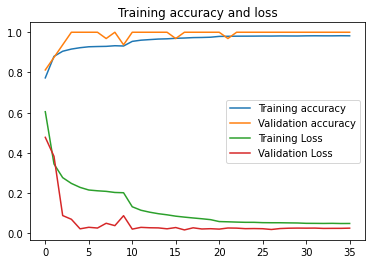

In [124]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')

# plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training accuracy and loss')
plt.legend()

plt.savefig('char.eps')
plt.savefig('char.jpg')
plt.show()

# Accuracy

In [40]:
model.evaluate(train_generator)

10436/10436 [==============================] - 90s 9ms/step - loss: 0.0434 - accuracy: 0.9847


[0.04344954714179039, 0.9846557378768921]

In [41]:
model.evaluate(validation_generator)

4/4 [==============================] - 0s 9ms/step - loss: 0.0260 - accuracy: 1.0000


[0.026043299585580826, 1.0]

In [42]:
model.evaluate(test_generator)

121/121 [==============================] - 1s 11ms/step - loss: 0.0430 - accuracy: 0.9917


[0.04301350563764572, 0.9917355179786682]

# Classification Report

In [44]:
loaded_model = tf.keras.models.load_model('best_model.h5')

In [45]:
loaded_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 128)      

In [58]:
def pred(test_directory, test_generator, class_no, best_model_address, dim):
    
    test_class_list = []
    for test_name in os.listdir(test_directory):
        test = os.path.join(test_directory, test_name)
        test_class_list.append(test)
    test_class_list.sort()
    
    y_true = test_generator.classes
    labels = test_generator.class_indices
    
    y_pred = []
    tot = len(os.listdir(test_class_list[1]))*class_no

    best_model = tf.keras.models.load_model(best_model_address)

    
    with tqdm(total=tot) as pbar:
        for i in range(class_no):
            for filename in os.listdir(test_class_list[i]):
                file = os.path.join(test_class_list[i], filename)
                img = cv2.imread(file)
                res = cv2.resize(img, (dim[0], dim[1]))
                normed = res / 255.0
                im_arr = normed.reshape(1, dim[0], dim[1], dim[2])

                pred = best_model.predict(im_arr)
                pred_categorical = tf.keras.utils.to_categorical(pred)

                if class_no >= 2:
                    max_pred = np.argmax(pred)
                else:
                    max_pred = np.argmax(pred_categorical)

                y_pred.append(max_pred)

                pbar.set_description("Progress")
                pbar.update()
                
    return y_true, y_pred, labels

In [60]:
class_no = 4
best_model_address = 'model.h5'
dim = (128,128,3)
y_true, y_pred, labels = pred(test_directory, test_generator, class_no, best_model_address, dim)

Progress: 100%|██████████| 968/968 [00:44<00:00, 21.62it/s]


In [95]:
def report(y_true, y_pred, labels):
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix 
    
    print("Calculating CLASSIFICATION REPORT: ")
    classification_reports = classification_report(y_true, y_pred, target_names=labels)
    print(classification_reports)

    print("\nCalculating SENSITIVITY & SPECIFICITY..........:")
    cm = confusion_matrix(y_true, y_pred)
    total = sum(sum(cm))

    
    return cm, classification_reports

In [96]:
cm, classification_reports  = report(y_true, y_pred, labels)

Calculating CLASSIFICATION REPORT: 
              precision    recall  f1-score   support

         CNV       0.98      1.00      0.99       242
         DME       1.00      0.98      0.99       242
      DRUSEN       1.00      0.99      0.99       242
      NORMAL       0.99      1.00      1.00       242

    accuracy                           0.99       968
   macro avg       0.99      0.99      0.99       968
weighted avg       0.99      0.99      0.99       968


Calculating SENSITIVITY & SPECIFICITY..........:


In [125]:
def conf_mat(cm, labels):
    fig, ax = plot_confusion_matrix(conf_mat=cm,
                                colorbar=True,
                                show_absolute=True,
                                class_names=labels,
                                show_normed=False)

#     plt.savefig('confusion-matrix.eps')
    plt.savefig('confusion-matrix.jpg')

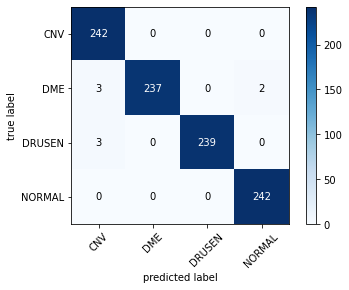

In [126]:
conf_mat(cm, labels)